<a href="https://colab.research.google.com/github/MdShahadatHossainbd/ObjectDetection/blob/master/Train_Neural_Network_by_loading_own_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import zipfile
import cv2
import os 

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


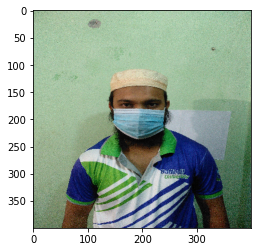

In [26]:
img = image.load_img("/content/gdrive/My Drive/ComputerVision/Data/Training/Mask/1.jpg" , target_size=(400, 400))
plt.imshow(img)

In [27]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy') > .98) & (logs.get('val_accuracy') > .9):
            print("Reached 98% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [28]:
cv2.imread("/content/gdrive/My Drive/ComputerVision/Data/Training/Mask/1.jpg").shape

(4000, 3000, 3)

In [29]:
cv2.imread("/content/gdrive/My Drive/ComputerVision/Data/Training/Mask/1.jpg")

array([[[152, 161, 135],
        [164, 173, 147],
        [171, 181, 158],
        ...,
        [156, 196, 154],
        [147, 187, 145],
        [136, 176, 134]],

       [[158, 169, 143],
        [166, 177, 151],
        [166, 179, 155],
        ...,
        [140, 180, 138],
        [134, 174, 132],
        [128, 168, 126]],

       [[159, 174, 146],
        [165, 180, 152],
        [166, 183, 156],
        ...,
        [142, 182, 140],
        [146, 186, 144],
        [150, 190, 148]],

       ...,

       [[ 88, 116,  87],
        [114, 142, 112],
        [121, 148, 114],
        ...,
        [ 41,  57,  33],
        [ 22,  37,  10],
        [ 17,  35,   6]],

       [[104, 132, 102],
        [117, 146, 113],
        [117, 145, 109],
        ...,
        [ 34,  53,  28],
        [ 19,  37,   8],
        [ 26,  47,  15]],

       [[ 91, 120,  87],
        [101, 131,  96],
        [106, 132,  96],
        ...,
        [ 31,  50,  25],
        [  3,  23,   0],
        [ 27,  48,  16]]

In [30]:
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/ComputerVision/Data/Training/',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
        '/content/gdrive/My Drive/ComputerVision/Data/Validation',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 61 images belonging to 2 classes.
Found 61 images belonging to 2 classes.


In [31]:
train_generator.class_indices

{'Mask': 0, 'NoMask': 1}

In [32]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [33]:
from tensorflow.keras.optimizers import RMSprop

In [34]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    #tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])


In [36]:
history = model.fit(
      train_generator,
      steps_per_epoch=1,  
      epochs=10,
      validation_data = validation_generator,callbacks=[callbacks])

Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: 0.6959 - accuracy: 0.5574 - val_loss: 13.7087 - val_accuracy: 0.6230
Epoch 2/10
1/1 [==============================] - 10s 10s/step - loss: 13.7087 - accuracy: 0.6230 - val_loss: 6.0981 - val_accuracy: 0.3770
Epoch 3/10
1/1 [==============================] - 10s 10s/step - loss: 6.0981 - accuracy: 0.3770 - val_loss: 4.0746 - val_accuracy: 0.6230
Epoch 4/10
1/1 [==============================] - 10s 10s/step - loss: 4.0746 - accuracy: 0.6230 - val_loss: 0.9459 - val_accuracy: 0.3770
Epoch 5/10
1/1 [==============================] - 10s 10s/step - loss: 0.9459 - accuracy: 0.3770 - val_loss: 0.8044 - val_accuracy: 0.6230
Epoch 6/10
1/1 [==============================] - 10s 10s/step - loss: 0.8044 - accuracy: 0.6230 - val_loss: 0.2644 - val_accuracy: 0.8852
Epoch 7/10
1/1 [==============================] - 10s 10s/step - loss: 0.2644 - accuracy: 0.8852 - val_loss: 0.1359 - val_accuracy: 0.9836
Epoch 8/10
1/1 [=========

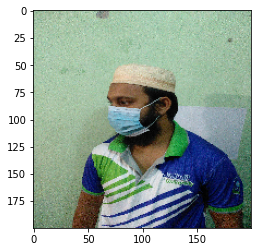

Mask


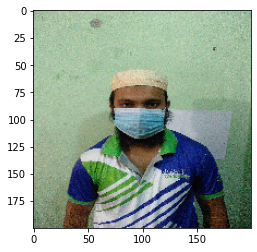

Mask


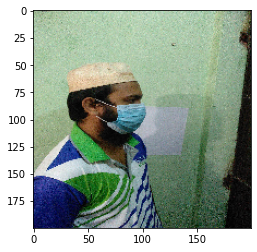

Mask


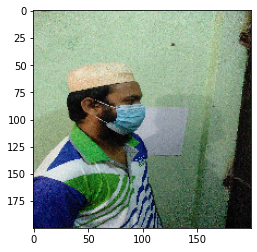

Mask


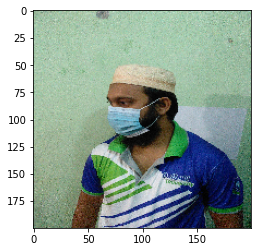

Mask


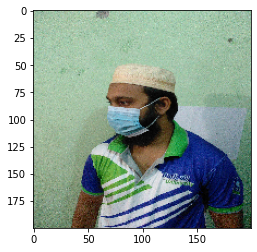

Mask


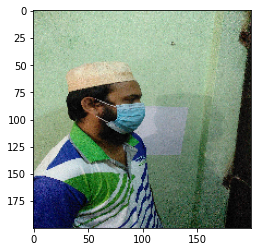

Mask


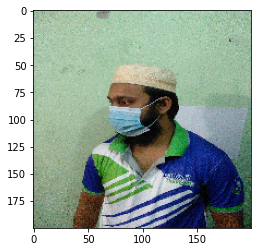

Mask


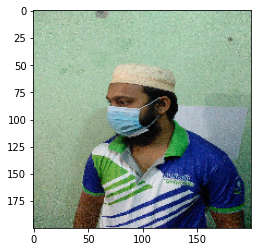

Mask


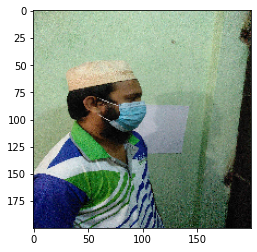

Mask


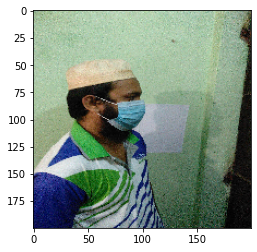

Mask


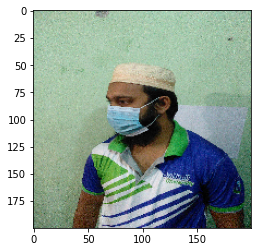

Mask


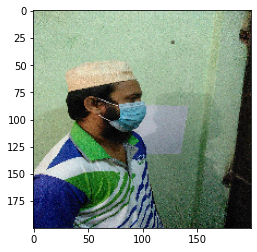

Mask


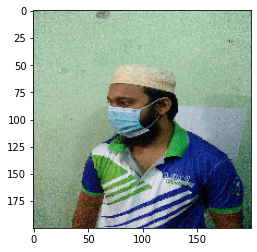

Mask


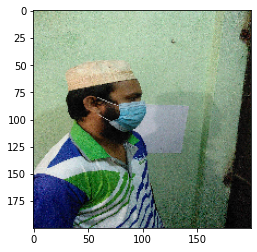

Mask


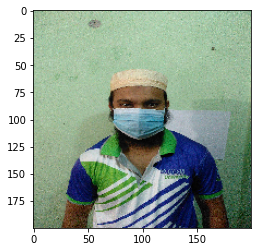

Mask


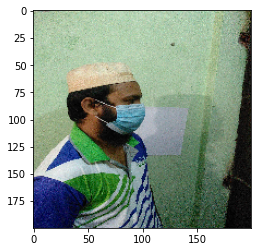

Mask


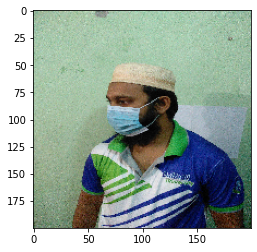

Mask


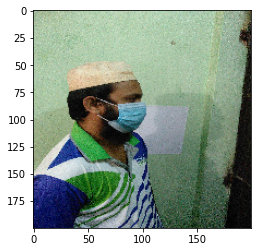

Mask


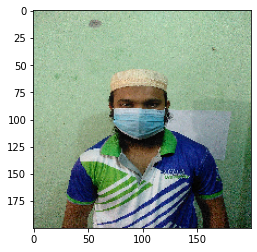

Mask


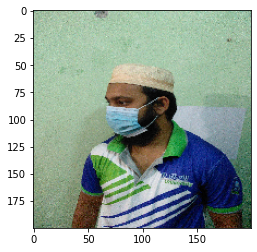

Mask


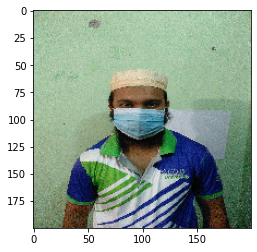

Mask


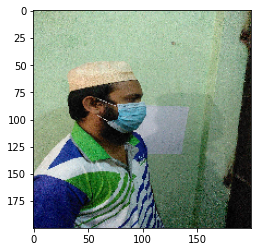

Mask


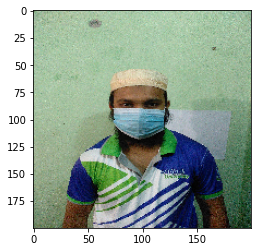

Mask


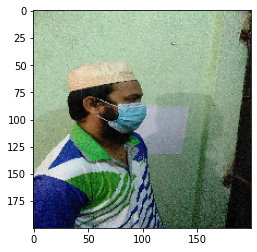

Mask


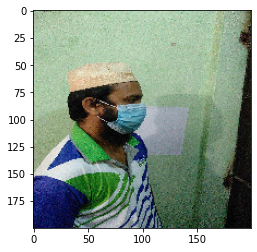

Mask


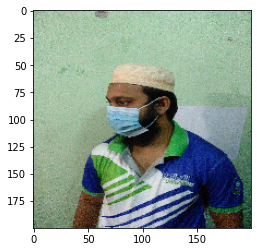

Mask


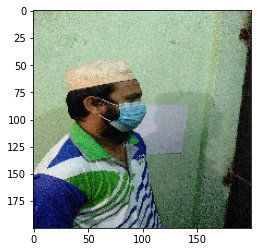

Mask


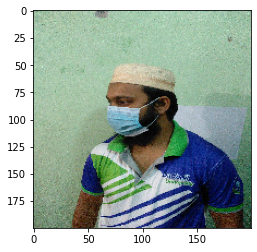

Mask


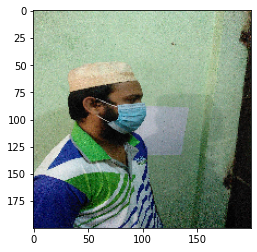

Mask


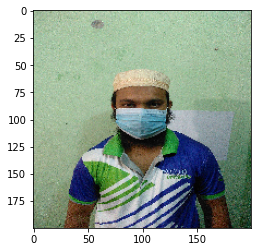

Mask


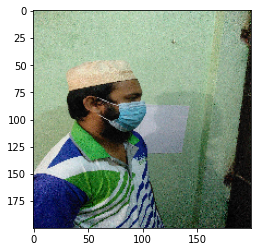

Mask


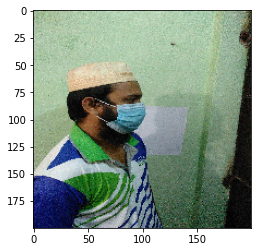

Mask


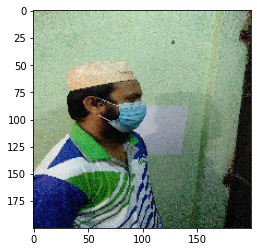

Mask


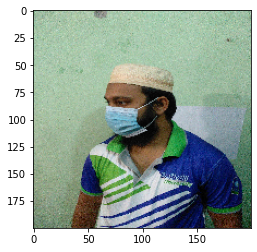

Mask


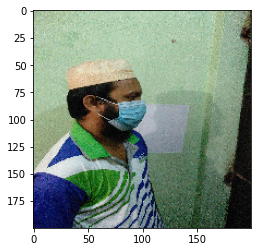

Mask


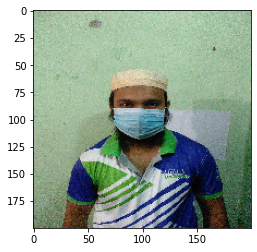

Mask


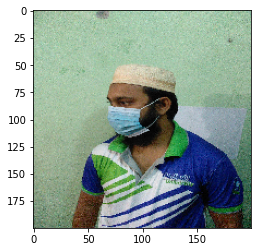

Mask


In [55]:
dir_path = "/content/gdrive/My Drive/ComputerVision/Data/Testing//Mask"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images)
    if classes == 0:
        print("Mask")
    else:
        print("NoMask")

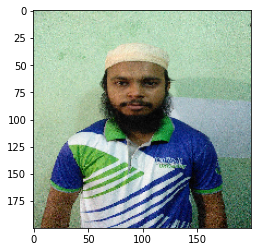

NoMask


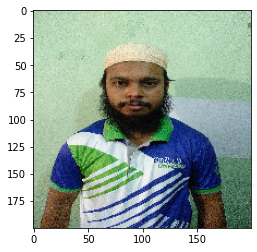

NoMask


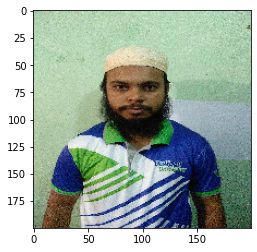

NoMask


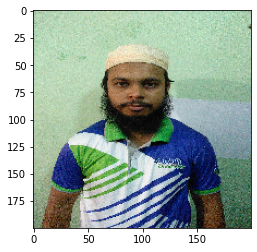

NoMask


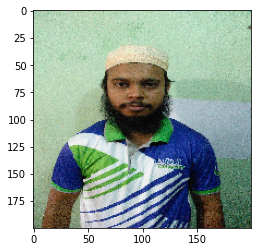

NoMask


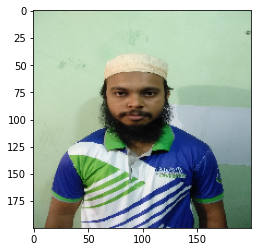

NoMask


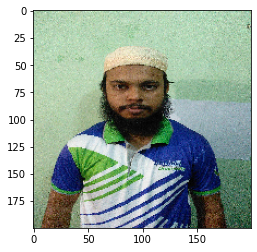

NoMask


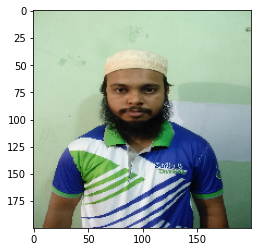

NoMask


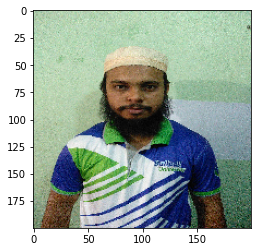

NoMask


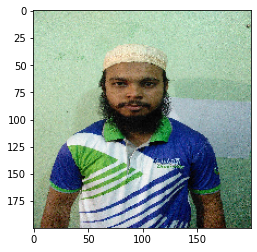

NoMask


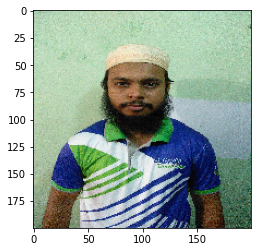

NoMask


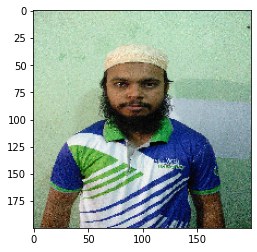

NoMask


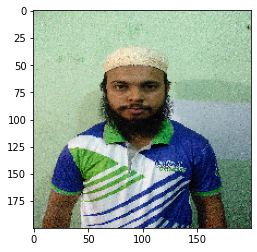

NoMask


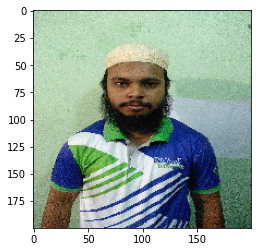

NoMask


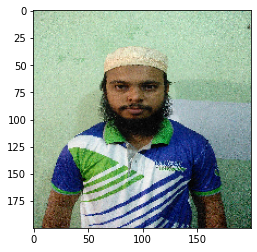

NoMask


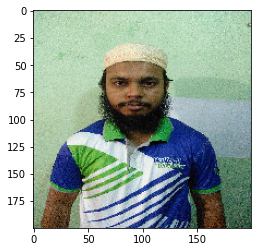

NoMask


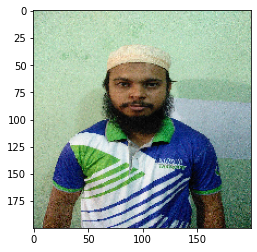

NoMask


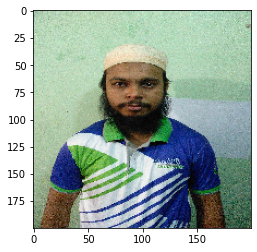

NoMask


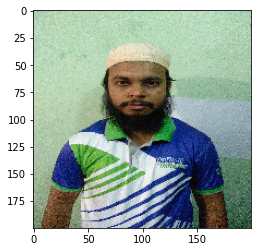

NoMask


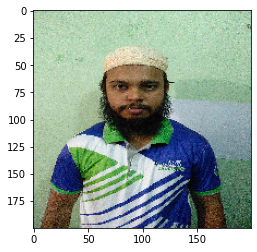

NoMask


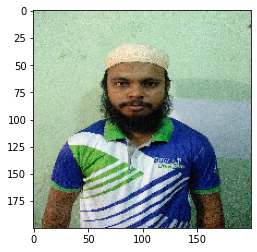

NoMask


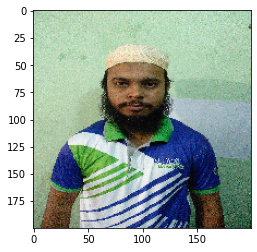

NoMask


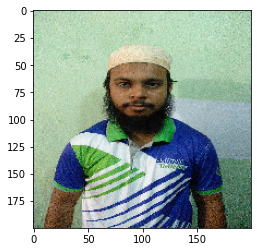

NoMask


In [56]:
dir_path = "/content/gdrive/My Drive/ComputerVision/Data/Testing//NoMask"

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ '//' + i , target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images)
    if classes == 0:
        print("Mask")
    else:
        print("NoMask")